# Titanic Challenge

Minha versão do desafio do Titanic, disponivel no link: [Titanic Dataset](https://www.kaggle.com/c/titanic)

Informacoes sobre o dataframe:

| variable | Definition|
|----------|----------|
| Survival |  Survival  |
| Pclass |  Ticket class  |
| Sex | Sex |
| Age | Age in years  |
| Sibsp | # of siblings / spouses aboard the Titanic  |
| Parch | # of parents / children aboard the Titanic  |
| Ticket |  Ticket number |
| Fare |  Passenger fare  |
| Cabin | Cabin number  |
| Embarked |  Port of Embarkation|


## **Lista de afazeres:**

- ~~Importar dados~~
- ~~Verificar estado dados~~
    ### *Tratamento dados*
- ~~Tratar coluna "Survived"~~
- ~~Tratar coluna "Age"~~
- ~~Tratar coluna "Cabin"~~
- ~~Tratar colunas para regressao logistica~~
   ### *Graficos basicos*
- ~~Grafico sobreviventes~~
- ~~Grafico sobreviventes por genero~~
- ~~Grafico sobreviventes por classe~~
- ~~Distribuicao de pessoas por idade~~
- ~~Distribuicao de preco do ticket~~
   ### *Graficos interativos*
- ~~Grafico sobreviventes~~
- ~~Grafico sobreviventes por genero~~
- Grafico sobreviventes por classe
    ### *Regressao Logistica*
- Construir modelo
- Treinar modelo
- Precisao do modelo
    ### *Outras features*
- Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
- Maybe the Cabin letter could be a feature
- Is there any info you can get from the ticket?

## Import de bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Carregamento e verificação de dataset

In [2]:
DATASET_DIR = "./dataset/"

df_titanic_train = pd.read_csv(DATASET_DIR + "train.csv")


In [3]:
df_titanic_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### Verifcação qualidade dataset

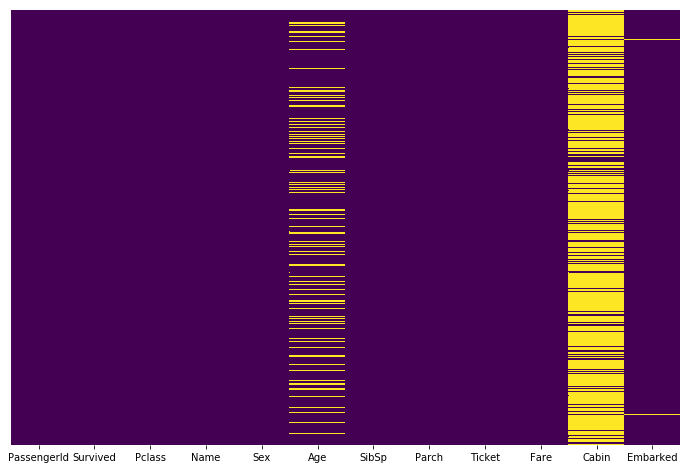

In [5]:
f,ax = plt.subplots(figsize = (12,8))
sns.heatmap(df_titanic_train.isnull(),yticklabels=False,cbar=False, cmap="viridis", ax=ax)

O dataset possui a coluna "Age" e "Cabin" com alto grau de dados nulos.

## Graficos basicos

#### Grafico sobreviventes

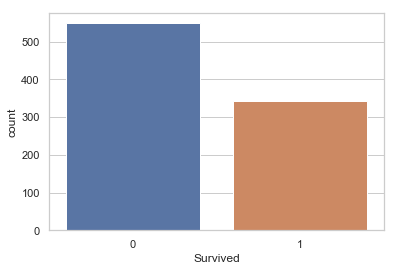

In [6]:
sns.set(style="whitegrid")
sns.countplot(x="Survived",data=df_titanic_train)

#### Grafico sobreviventes por genero

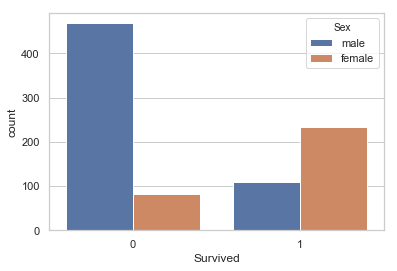

In [7]:
sns.set(style="whitegrid")
sns.countplot(x="Survived",data=df_titanic_train, hue="Sex")

#### Grafico sobreviventes por classe


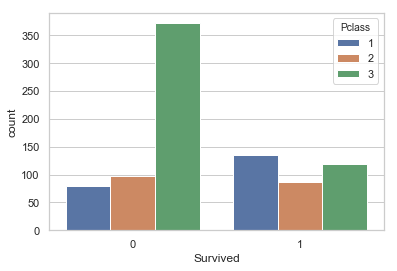

In [8]:
sns.set(style="whitegrid")
sns.countplot(x="Survived",data=df_titanic_train, hue="Pclass")

#### Distribuicao de pessoas por idade


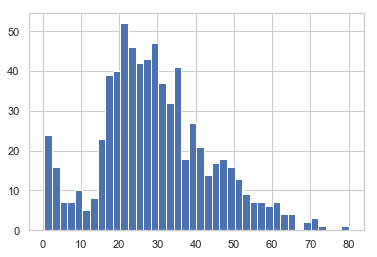

In [9]:
df_titanic_train["Age"].hist(bins=40)

#### Distribuicao de preco do ticket

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A0741EF1D0>]],
      dtype=object)

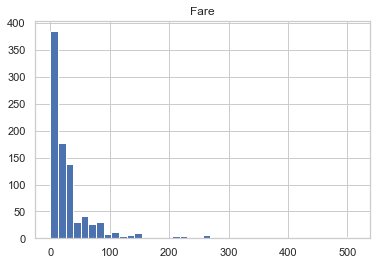

In [10]:
df_titanic_train.hist(column="Fare", bins=40)

## Tratamento dados

### Tratar coluna "Survived"

In [11]:
df_train_surv = df_titanic_train
df_train_surv[["Survived"]] = df_train_surv["Survived"].apply(lambda value: value != 0)

In [12]:
df_train_surv.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,False,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,False,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,False,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,True,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,True,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Tratar coluna "Age"

In [13]:
mean_age=df_train_surv.groupby("Pclass").mean()["Age"].apply(np.round)
mean_age

Pclass
1    38.0
2    30.0
3    25.0
Name: Age, dtype: float64

In [14]:
def fill_nan_age(row):
    age = row[1]
    pclass = row[0]
    if pd.isnull( age ):
        age = mean_age[pclass]
    return age


In [15]:
df_age_fix = df_train_surv
df_age_fix["Age"] = df_age_fix[["Pclass", "Age"]].apply(fill_nan_age, axis=1)
df_age_fix.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,False,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q
6,7,False,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,False,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,True,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,True,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Tratar coluna "Cabin"

In [16]:
df_cabin_drop = df_age_fix

In [17]:
df_cabin_drop = df_cabin_drop.drop("Cabin", axis=1)

In [18]:
df_cabin_drop.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Tratar colunas para regressao logistica

In [19]:
df_log_treat = df_cabin_drop
df_log_treat["Male"] = df_log_treat["Sex"].apply(lambda sex : sex == "male")

In [20]:
df_log_treat.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Male
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True


In [21]:
df_log_treat = df_log_treat.drop(["Name","Sex","Ticket","Embarked"], axis=1)


In [22]:
df_log_treat.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Male
0,1,False,3,22.0,1,0,7.2500,True
1,2,True,1,38.0,1,0,71.2833,False
2,3,True,3,26.0,0,0,7.9250,False
3,4,True,1,35.0,1,0,53.1000,False
4,5,False,3,35.0,0,0,8.0500,True


### Graficos interativos

In [120]:
import cufflinks as cf
import plotly.plotly as py
import plotly.graph_objs as go
cf.go_offline()

#### Survived

In [88]:
df_log_treat["Survived"].iplot(kind="hist", title="SURVIVED")

##### Survived by gender

In [127]:
female = go.Bar(x=df_log_treat.loc[df_log_treat["Male"] == False].groupby("Survived")["Male"].count().index,
                  y=[ df_log_treat.loc[df_log_treat["Male"] == False].groupby("Survived")["Male"].count()[0],
                      df_log_treat.loc[df_log_treat["Male"] == False].groupby("Survived")["Male"].count()[1] ],
                name = "Female")
male = go.Bar(x=df_log_treat.loc[df_log_treat["Male"] == True].groupby("Survived")["Male"].count().index,
              y=[ df_log_treat.loc[df_log_treat["Male"] == True].groupby("Survived")["Male"].count()[0],
                 df_log_treat.loc[df_log_treat["Male"] == True].groupby("Survived")["Male"].count()[1] ],
              name = "Male")

data = [female, male]
layout = go.Layout(title='Survived? (by Gender)')
fig = go.Figure( data=data, layout=layout )

py.iplot(fig, filename='bar-line')

C:\Users\Helio WORK Junior\Anaconda3\envs\py_data\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



##### Survived by class

# Treinamento modelo